## Wavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

plt.style.use(["bmh"])

In [2]:
# Wavelet Ricker


def ricker_wavelet(peak_freq, samples, dt):
    """
    Generate a Ricker wavelet.

    Parameters:
    - peak_freq (float): The peak frequency of the wavelet.
    - samples (int): The number of samples in the wavelet.
    - dt (float): The time step between samples in miliseconds.

    Returns:
    - ricker (ndarray): The generated Ricker wavelet.
    """
    # Calculate time array
    t = np.arange(samples) * (dt)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    ricker = (1.0 - 2.0 * (np.pi**2) * (peak_freq**2) * (t**2)) * np.exp(
        -(np.pi**2) * (peak_freq**2) * (t**2)
    )

    return t, ricker

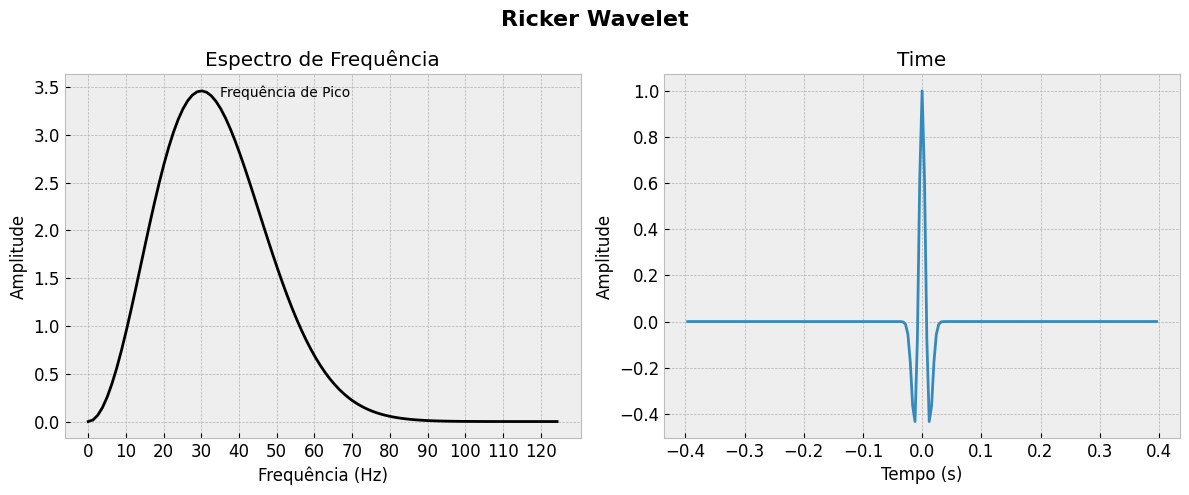

In [42]:
frequencia_de_pico = 30
amostras = 100
dt = 0.004

tricker, wvricker = ricker_wavelet(
    peak_freq=frequencia_de_pico, samples=amostras, dt=dt
)

freqs = np.fft.rfftfreq(tricker.shape[0], d=dt)
fft = np.abs(np.fft.rfft(wvricker))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Ricker Wavelet", fontsize=16, fontweight="bold")

axs[0].plot(freqs, fft, color="black")
axs[0].set_title("Espectro de Frequência")
axs[0].set_xlabel("Frequência (Hz)")
axs[0].set_ylabel("Amplitude")
axs[0].set_xticks(np.arange(0, 121, 10))
axs[0].tick_params(axis="both", labelsize=12)
axs[0].annotate(
    "Frequência de Pico",
    (30, 3.4),
    textcoords="offset points",
    xytext=(60, 0),
    ha="center",
)

axs[1].plot(tricker, wvricker)
axs[1].set_title("Time")
axs[1].set_xlabel("Tempo (s)")
axs[1].set_ylabel("Amplitude")
axs[1].tick_params(axis="both", labelsize=12)


plt.tight_layout()
plt.show()